<a href="https://colab.research.google.com/github/ucfilho/Raianars_SelfTest_July_2020/blob/master/Frank_Noisy_Quartic_Oscillation_jun_29_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Noisy_Quartic
# In the paper Ngen=3000
# JADE: Adaptive Differential Evolution with Optional External Archive

In [2]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 211 (delta 41), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (211/211), 646.13 KiB | 6.73 MiB/s, done.
Resolving deltas: 100% (113/113), done.
/content/Raianars_paper_One


In [3]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=3000 #10 # PONTOS quantas vezes vai alteral NPAR 
RefCont=50 # each 25 iterations return parater to old value
mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão

############################### Função
dim=30
NPAR=100
#fchoice='Rastrigin' #fchoice='Michalewicz' #fchoice='Schwefel'
fchoice='Noisy_Quartic'
Fun=Function.Noisy_Quartic

MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS


In [4]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [5]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/Raianars_paper_One/ANN_read_matrix


In [6]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [7]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [8]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [9]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [10]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [11]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [12]:
##################################### 

#TOTAL=7*dim*its*ITE
TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO



MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
for i in range(rodadas):
  SOMA=0
  pop = np.random.rand(NPAR, dimensions)
  diff=np.zeros(PAR)
  for ii in range(PAR):
    diff[ii] = MAX[ii]-MIN[ii]
  X = MIN + pop * diff
    
  PONTOS=ITE # DIVISOES DA POPULACAO
 
 


In [13]:
#NPAR=int(NPAR/2)
start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for i in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    SOMAf=0
    start_ite = time.time()
    delta_time=(start_ite-start_time)/60
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    for ii in range(PAR):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
    Xf = MIN + pop * diff
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X])

    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X,Fitness)
    nrow,ncol=X.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1

    
    for k in range(ITE):
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
      #Xf,BESTf,FOBESTf,XYf,BEST_XYf,SOMAf= de_soma_Insight.de(MAX,MIN, Fi, CRi, NPAR,its,Fun,Xf,SOMAf,TOTAL)

      
      MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]

      Fitness = np.asarray([Fun(ind) for ind in X])
      #Fitnessf = np.asarray([Fun(ind) for ind in Xf])
      Maior=np.argmax(Fitness)
      #Maiorf=np.argmax(Fitnessf)
      Menor=np.argmin(Fitness)
      
      if (((k+1)% RefCont) == 0):
        mut=0.5
        crossp=0.5
        MAT_IND[0,15]=mut # value of mut
        MAT_IND[0,16]=crossp # value of crossp

    print('RUN=',i,'total=50','time=',delta_time,'FOBJ=',FOBEST)
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

RUN= 0 total=50 time= 6.88632329305013e-06 FOBJ= 0.13546773977302062
RUN= 1 total=50 time= 3.7633376479148866 FOBJ= 0.09781999129784781
RUN= 2 total=50 time= 7.518219264348348 FOBJ= 0.1918837204316989
RUN= 3 total=50 time= 11.30189318259557 FOBJ= 0.15181720222674433
RUN= 4 total=50 time= 15.091740568478903 FOBJ= 0.14511382074566964
RUN= 5 total=50 time= 18.845321834087372 FOBJ= 0.15418008873233646
RUN= 6 total=50 time= 22.580083513259886 FOBJ= 0.146302510401692
RUN= 7 total=50 time= 26.33753184080124 FOBJ= 0.1346658620866748
RUN= 8 total=50 time= 30.080221923192344 FOBJ= 0.10133266163595192
RUN= 9 total=50 time= 33.77850300868352 FOBJ= 0.2631676528894942
RUN= 10 total=50 time= 37.425331417719526 FOBJ= 0.14357944356812946
RUN= 11 total=50 time= 41.047564045588175 FOBJ= 0.17450344098810602
RUN= 12 total=50 time= 44.68440947930018 FOBJ= 0.14412801849757137
RUN= 13 total=50 time= 48.31208209196726 FOBJ= 0.1257090245080374
RUN= 14 total=50 time= 51.994482497374214 FOBJ= 0.14432677740542996


In [14]:
# print(TOTAL)

In [15]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [16]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0             3.992766     0.983623  0.000222         1.0      0.0  100.0   
1             3.941145     0.970906  0.000444         1.0      0.0  100.0   
2             3.908492     0.962862  0.000667         1.0      0.0  100.0   
3             3.852627     0.949099  0.000889         1.0      2.0  100.0   
4             3.809454     0.938464  0.001111         1.0      0.0  100.0   
...                ...          ...       ...         ...      ...    ...   
2995          0.652462     0.160735  0.665778         1.0      2.0  100.0   
2996          0.650365     0.160218  0.666000         1.0      2.0  100.0   
2997          0.648933     0.159865  0.666222         1.0      2.0  100.0   
2998          0.650259     0.160192  0.666444         1.0      2.0  100.0   
2999          0.647182     0.159434  0.666667         2.0      2.0  100.0   

            Fo       CRo       fmin        fmax  AD_fmin  AD_fmax  DELTA FO

Text(0, 0.5, 'CR')

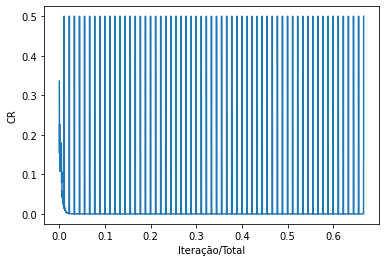

In [17]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

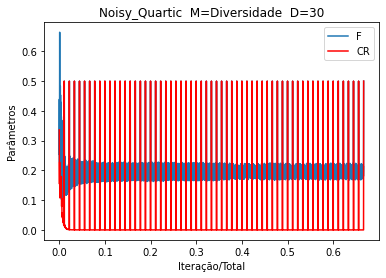

In [18]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Noisy_Quartic_Diversidade_D=30')

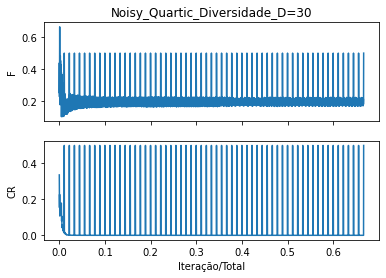

In [19]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [20]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

DE_POP_VAR_F_CR TOTAL= 450000 Iterações= 3000 Dim= 30 Min/Max= -1.28 / 1.28 _ Noisy_Quartic
_ANN_Div3x4_Fo-0.5_CRo-0.5_D-30_Interv-3000 

MÉDIA:  0.14831581207246322
MIN __: 0.058776458483675936
MAX__:  0.27147901315092116
STD __: 0.04080990323654605
Tempo Médio= 232.986 segundos ---
50 Rodadas

BEST:  [ 0.13896511  0.15752711  0.03594776 -0.18125785 -0.02076087  0.06632417
 -0.14160759 -0.00486155  0.04625587 -0.00410118  0.09077887 -0.01918388
 -0.05789016  0.10454227 -0.04735522  0.03560304 -0.02712645 -0.1429397
 -0.07582544 -0.18581527 -0.06082088  0.0547204   0.05128232 -0.06634164
 -0.05188629 -0.03438597  0.10160172  0.01784851  0.04796315  0.02227333
  0.05877646]
